In [22]:
## Importing the relevant packages:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("figure_1_source_data.csv")
df = df.sort_values("num_prop_companies", ascending = False)
print(len(df))
df

23


,industry,num_total_companies,num_misinfo_companies,num_prop_companies,misinfo_num_appearances,prop_total_misinfo_appearances,non_misinfo_num_appearances,prop_total_non_misinfo_appearances,misinfo_factor
21,Holding companies,294,241,0.819728,19649,3.869498,430461,4.943939,0.782675
6,Technology,1631,1289,0.790313,60291,11.873169,943453,10.835764,1.095739
17,Telecommunications,217,168,0.774194,13132,2.586098,251127,2.884249,0.896628
13,Travel,1452,1100,0.757576,29284,5.766928,506715,5.819733,0.990927
16,Insurance,346,258,0.745665,19982,3.935076,364164,4.182503,0.940842
10,Natural gas & electric,221,161,0.728507,5258,1.035463,88122,1.012100,1.023084
4,Education,1306,928,0.710567,19785,3.896280,307558,3.532371,1.103021
7,Business solutions,1424,999,0.701545,38104,7.503860,615006,7.063479,1.062346
19,Food & beverages,730,508,0.695890,9269,1.825354,192681,2.212984,0.824838
1,Apparel & accessories,919,636,0.692057,31306,6.165123,430776,4.947557,1.246094


In [24]:
df.columns

Index(['industry', 'num_total_companies', 'num_misinfo_companies',
       'num_prop_companies', 'misinfo_num_appearances',
       'prop_total_misinfo_appearances', 'non_misinfo_num_appearances',
       'prop_total_non_misinfo_appearances', 'misinfo_factor'],
      dtype='object')

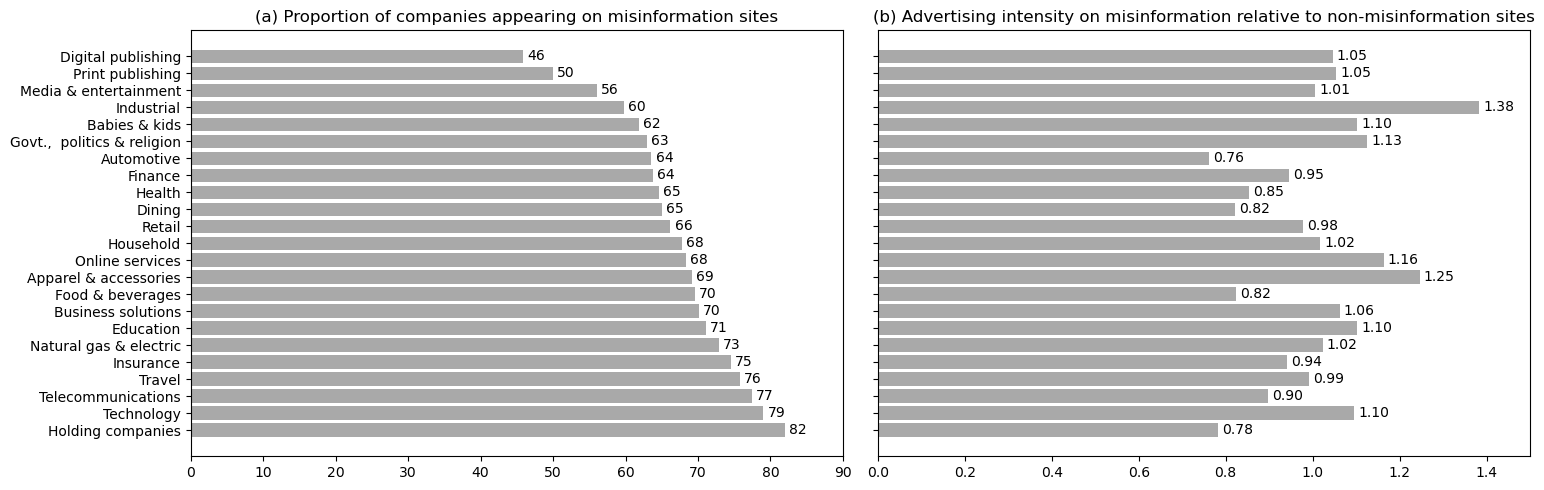

In [25]:
industry = df['industry'].to_list() 
prop_misinfo_company =  df['num_prop_companies'] * 100 
prop_misinfo_company = prop_misinfo_company.to_list() 
prop_misinfo_intensity =  df['misinfo_factor'].to_list() 

fig, axes = plt.subplots(figsize = (15.5, 5), sharey = True, ncols = 2, tight_layout=True)
bar_0 = axes[0].barh(industry, prop_misinfo_company, align = 'center', color = 'darkgray') 
bar_1 = axes[1].barh(industry, prop_misinfo_intensity, align = 'center', color = 'darkgray')

# Function to add data labels to the bars
def add_labels(bars, ax, index):
    for bar in bars:
        width = bar.get_width()
        if index == 0:
            label_text = f'{int(round(width))}'
        else:
            label_text = f'{width:.2f}'
        ax.annotate(label_text, xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0), textcoords='offset points', ha='left', va='center')
    if index == 0:
        ax.set_xlim(right = 90)
        ax.set_title('(a) Proportion of companies appearing on misinformation sites')
    elif index == 1:
        ax.set_xlim(right = 1.5)
        ax.set_title('(b) Advertising intensity on misinformation relative to non-misinformation sites')

add_labels(bar_0, axes[0], index = 0)
add_labels(bar_1, axes[1], index = 1)

plt.subplots_adjust(left=0.25, right=0.75) 

# Saving the figure in PDF
plt.savefig('Figure_1.pdf')

plt.show()